In [186]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)

In [187]:
values <- read_csv("scenario_1.csv") %>%
    filter(q < 2500) %>%
    mutate(ddf = c(0, diff(df))) %>%
    mutate(ns = q - f/df) %>%
    mutate(cr = abs(ddf/df)) %>%
    mutate(dr = abs(ns - 1188.84))

Parsed with column specification:
cols(
  q = col_integer(),
  h = col_double(),
  dh = col_double(),
  l = col_double(),
  dl = col_double(),
  f = col_double(),
  df = col_double()
)


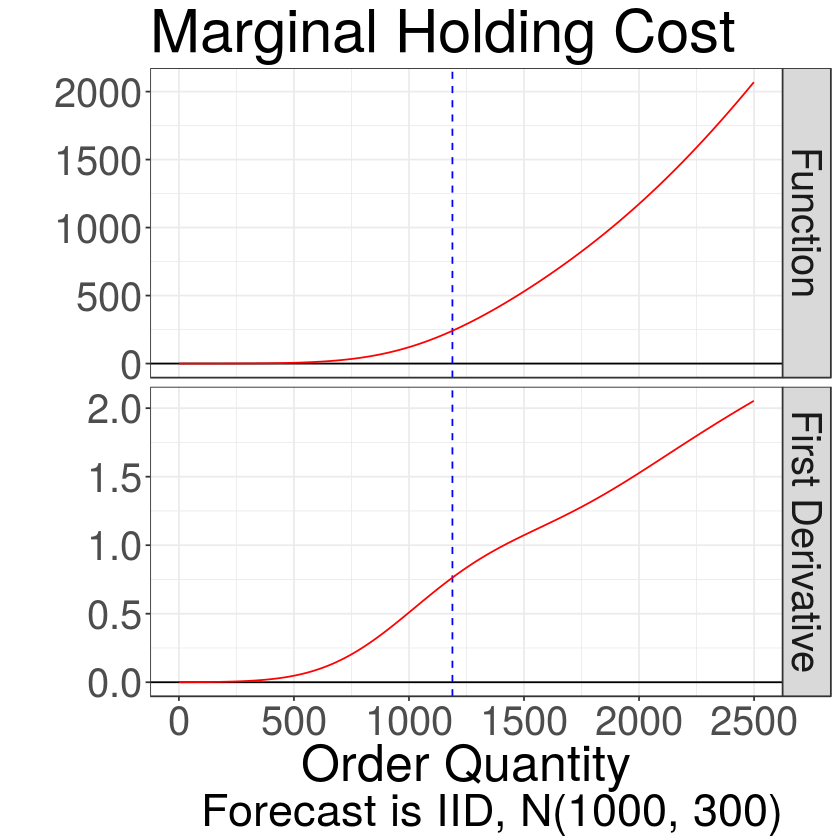

In [191]:
plot_data <- values %>%
    select(q, Function=h, `First Derivative`=dh) %>%
    gather(key, value, -q) %>%
    mutate(key=factor(key, levels=c("Function", "First Derivative")))

ggplot(plot_data, aes(x=q, y=value)) + 
    geom_hline(yintercept=0) +
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    geom_line(color="red") +
    theme_bw() +
    labs(title = "Marginal Holding Cost",
         caption = "Forecast is IID, N(1000, 300)", 
         x = "Order Quantity", 
         y = ""
        ) +
    facet_grid(key~., scales="free_y") + 
    theme(text = element_text(size=30))

ggsave("holding_function_slides.png", height=9, width=16, units="in")

In [184]:
plot_data <- values %>%
    select(q, Function=f, `First Derivative`=df) %>%
    gather(key, value, -q) %>%
    mutate(key=factor(key, levels=c("Function", "First Derivative")))

ggplot(plot_data, aes(x=q, y=value)) + 
    geom_hline(yintercept=0) +
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    geom_line(color="red") +
    theme_bw() +
    labs(title = "Dual Balancing Policy Root Function",
         caption = "Forecast is IID, N(1000, 300)", 
         x = "Order Quantity", 
         y = ""
        ) +
    facet_grid(key~., scales="free_y") + 
    theme(text = element_text(size=30))

ggsave("root_function_slides.png", height=9, width=16, units="in")

ERROR: Error in tikz(file = "root_function.tex", width = 5, height = 5): could not find function "tikz"


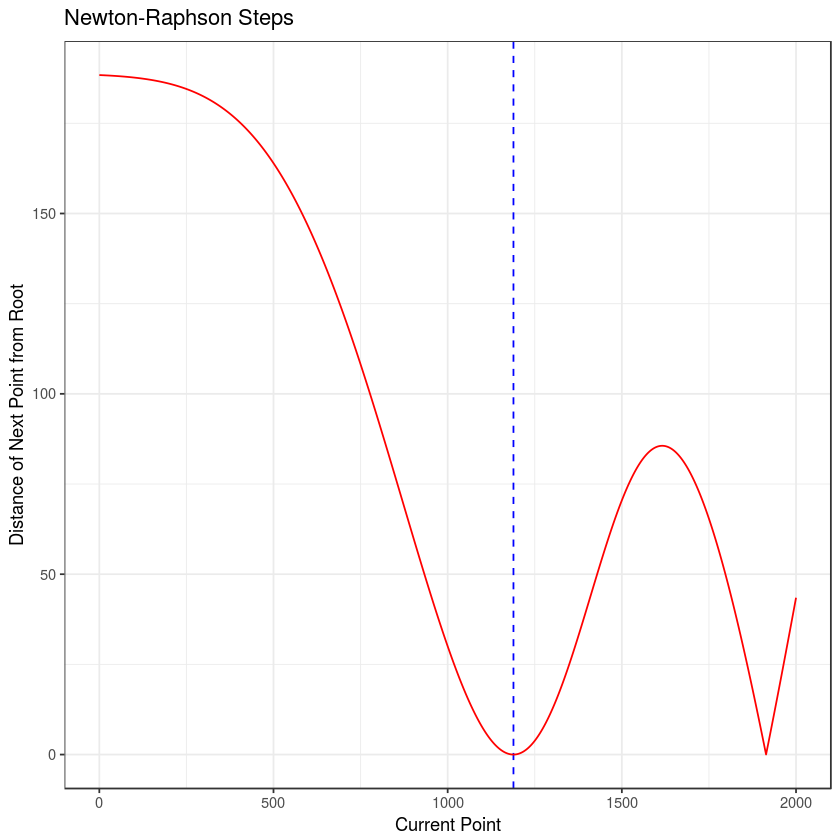

In [142]:
plot_data <- values %>%
    filter(q >= 0 & q <= 2000) %>%
    select(`Current Point`=q, `Next Point`=ns, `Distance of Next Point from Root`=dr)

ggplot(plot_data, aes(x=`Current Point`, y=`Distance of Next Point from Root`)) + 
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    geom_line(color="red") +
    theme_bw() +
    xlim(0, 2000) + 
    ggtitle("Newton-Raphson Steps")